In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
data.shape #No:of rows and columns

(2224, 11)

In [4]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
data["date_index"] = data["Date_month_year"] + " " +data["Time"] #to add 2 columns

In [6]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
0,250635,Comcast Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM
4,307175,Comcast not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM


# Correction if any wrong format exists

In [7]:
data["date_index"] = pd.to_datetime(data["date_index"])
data["Date_month_year"] = pd.to_datetime(data["Date_month_year"])

In [8]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
0,250635,Comcast Cable Internet Speeds,22-04-2015,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-2015,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-2015,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,26-05-2015,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [9]:
data.isna().sum() #to find if any null values are present or not

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
date_index                     0
dtype: int64

In [10]:
data.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [11]:
data=data.set_index(data["date_index"]) #to give index as date_index

In [12]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-2015,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-2015,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-2015,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-2015,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [13]:
data["Date_month_year"].value_counts()[:5]

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
Name: Date_month_year, dtype: int64

<AxesSubplot:>

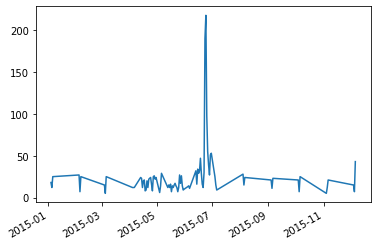

In [14]:
data["Date_month_year"].value_counts().plot()

In [15]:
data.groupby(pd.Grouper(freq='M')).size()

date_index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

<AxesSubplot:xlabel='date_index'>

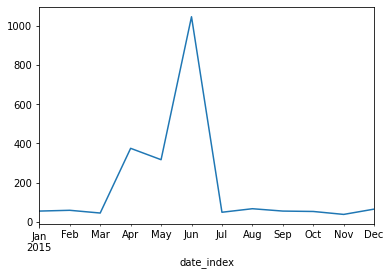

In [16]:
data.groupby(pd.Grouper(freq='M')).size().plot()

In [17]:
data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [18]:
data["new_status"]=["Open" if Status=="Open" or Status=="Pending" else "solved" for Status in data["Status"]]


In [19]:
data.head(20)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,new_status
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-2015,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,solved
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-2015,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,solved
2015-04-18 09:55:47,242732,Speed and Service,18-04-2015,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,solved
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-2015,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,solved
2015-12-06 21:59:40,338519,ISP Charging for arbitrary data limits with ov...,06-12-2015,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-12-06 21:59:40,solved
2015-06-24 10:13:55,361148,Throttling service and unreasonable data caps,24-06-2015,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24 10:13:55,Open
2015-06-23 18:56:14,359792,Comcast refuses to help troubleshoot and corre...,23-06-2015,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2015-06-23 18:56:14,solved
2015-01-06 23:46:30,318072,Comcast extended outages,06-01-2015,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,2015-01-06 23:46:30,solved


In [20]:
data.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,new_status
date_index,,,,,,,,,,,,,
2015-02-04 09:13:18,213550,Service Availability,04-02-2015,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18,solved
2015-02-06 13:24:39,318775,Comcast Monthly Billing for Returned Modem,06-02-2015,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39,solved
2015-09-06 17:28:41,331188,complaint about comcast,06-09-2015,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41,solved
2015-06-23 23:13:30,360489,Extremely unsatisfied Comcast customer,23-06-2015,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-06-23 23:13:30,solved
2015-06-24 22:28:33,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-2015,2015-06-24,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes,2015-06-24 22:28:33,Open


In [21]:
data.groupby(["State"]).size().sort_values(ascending=True).to_frame().reset_index().rename({0: "Count"}, axis=1)

,State,Count
0,Nevada,1
1,Iowa,1
2,Montana,1
3,Rhode Island,1
4,District of Columbia,1
5,Kansas,2
6,Ohio,3
7,Vermont,3
8,North Carolina,3
9,Missouri,4


In [22]:
Status_complaints = data.groupby(["State","new_status"]).size().unstack().fillna(0)
Status_complaints

new_status,Open,solved
State,,
Alabama,9.0,17.0
Arizona,6.0,14.0
Arkansas,0.0,6.0
California,61.0,159.0
Colorado,22.0,58.0
Connecticut,3.0,9.0
Delaware,4.0,8.0
District Of Columbia,2.0,14.0
District of Columbia,0.0,1.0


<AxesSubplot:ylabel='State'>

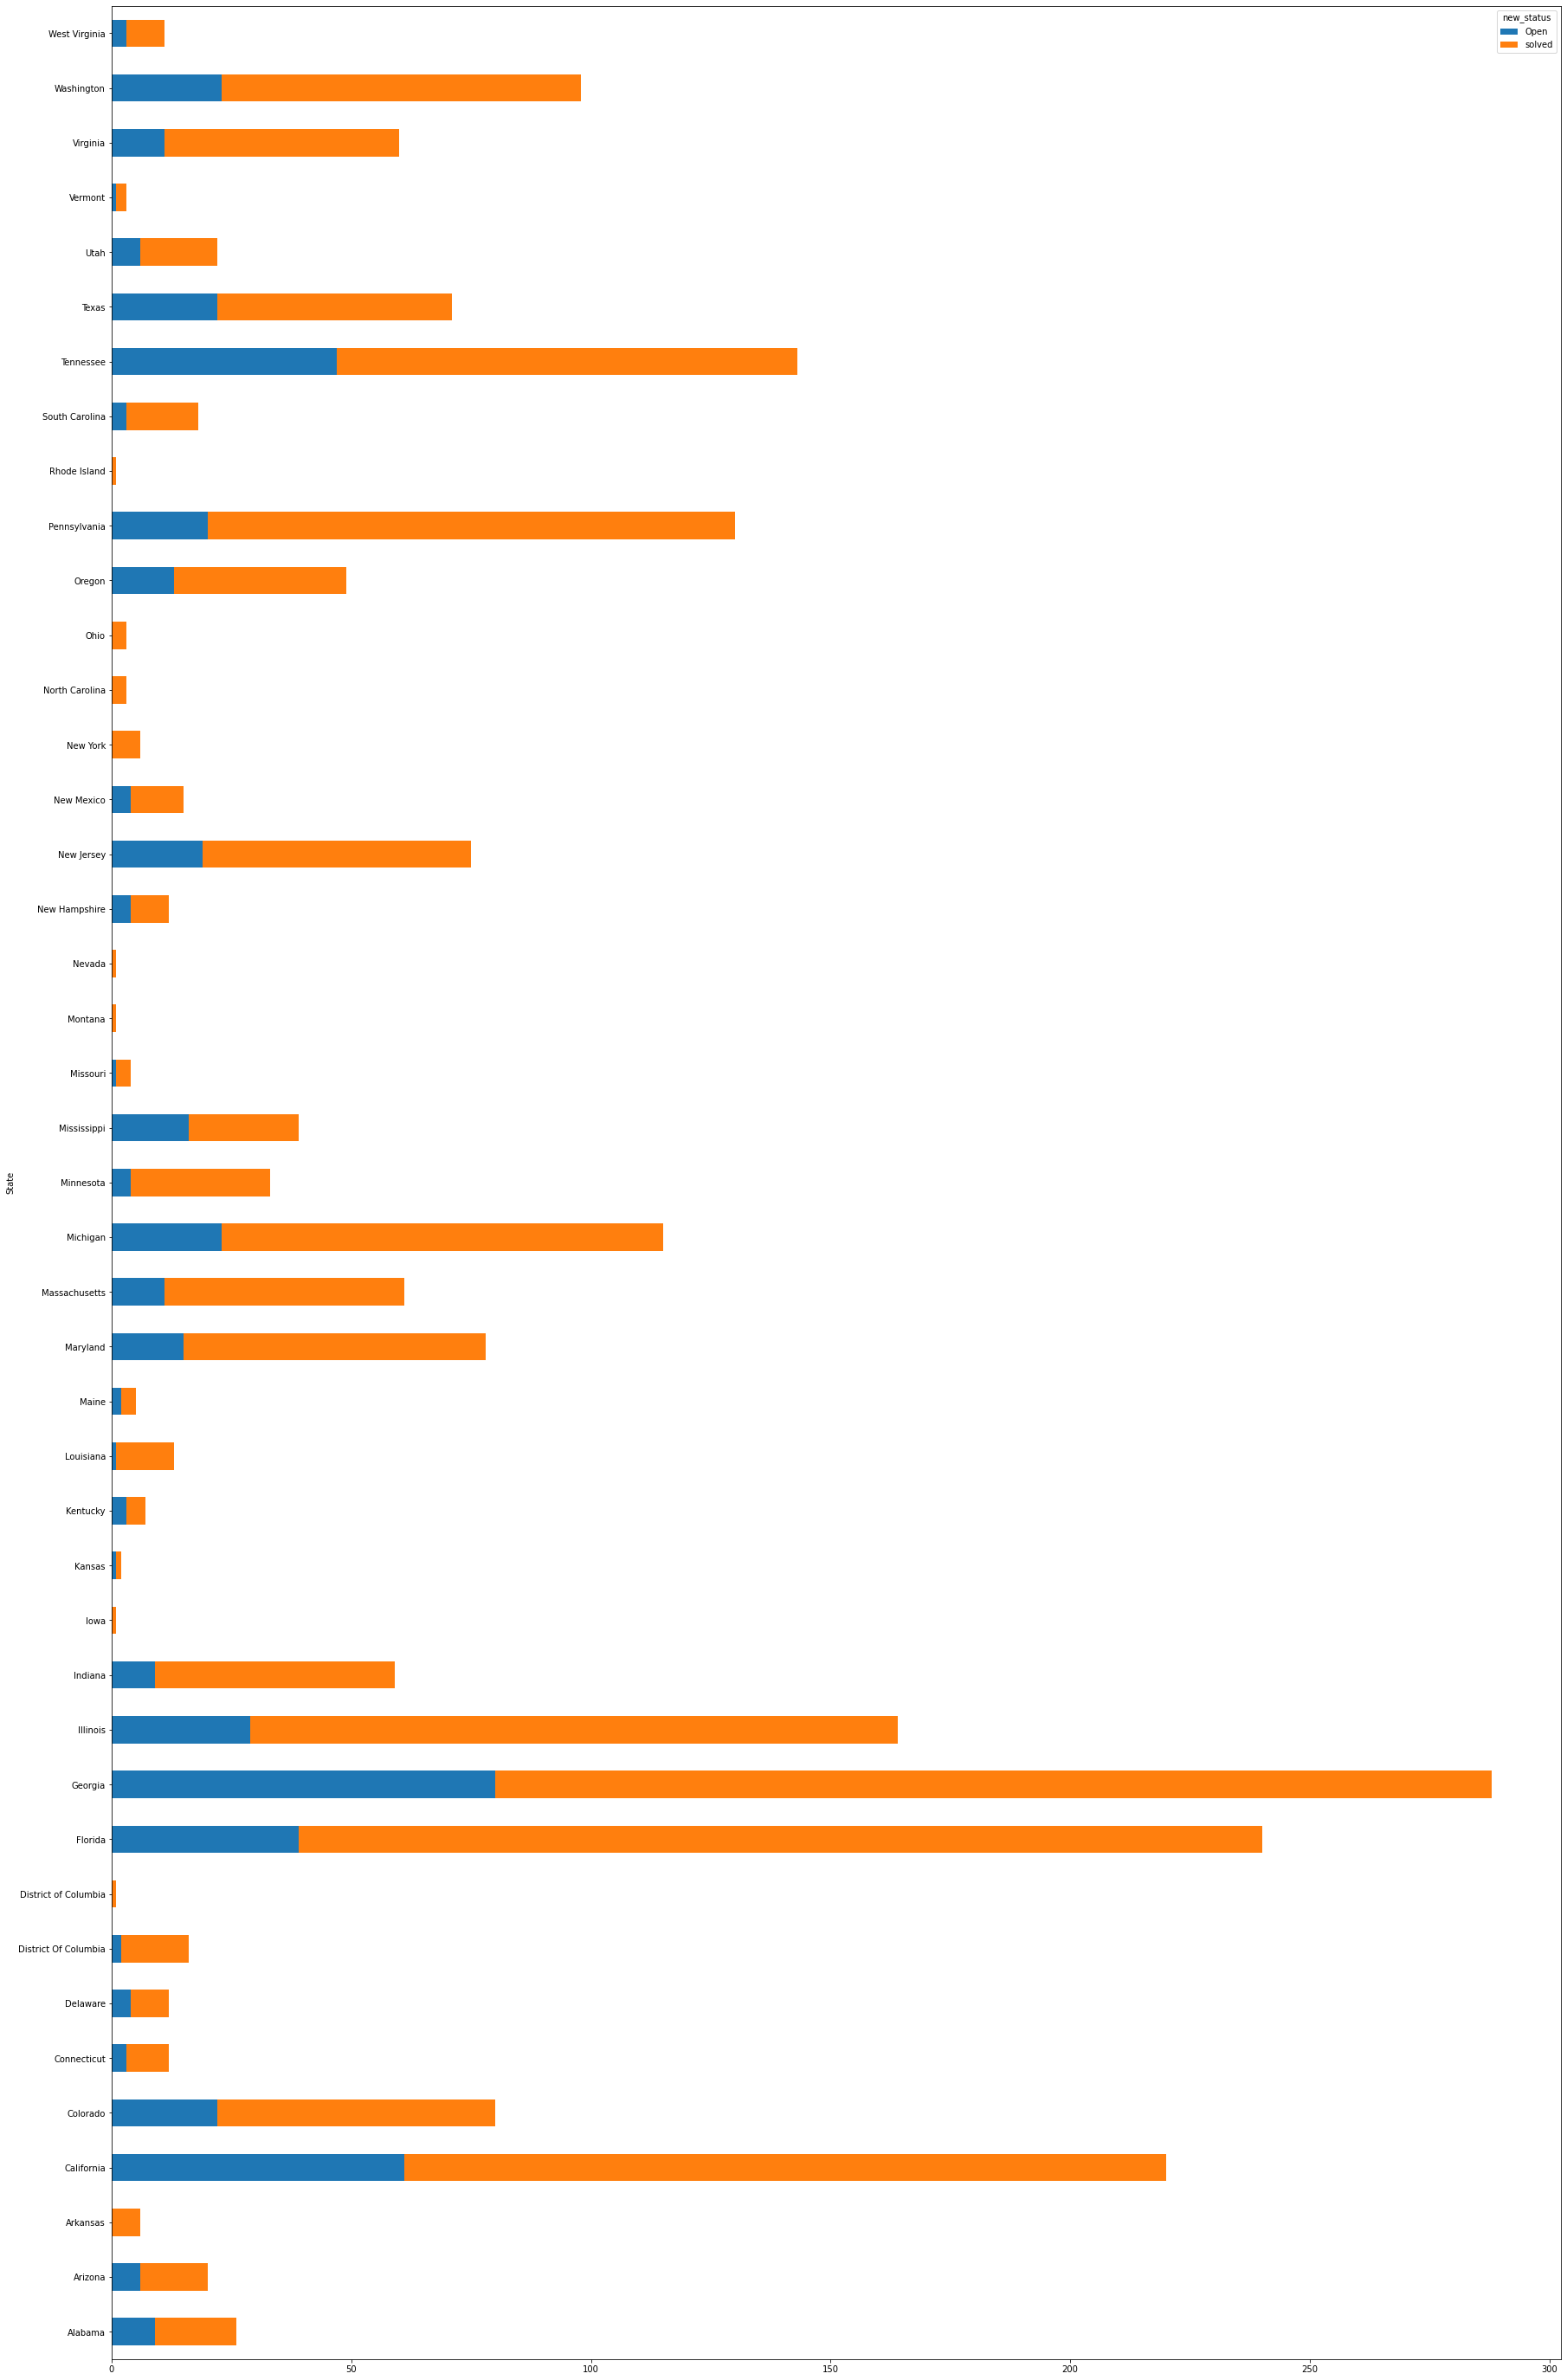

In [23]:
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)

In [24]:

data.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [26]:
data.groupby(["State","new_status"]).size().unstack().fillna(0).max()

new_status
Open       80.0
solved    208.0
dtype: float64